In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
fish_path = 'fish_data.npy'
data = np.load(fish_path, allow_pickle=True)

fish_data = data.item()

In [3]:
# Separate the labels and lightness values
fish_lightness = fish_data['lightness']
fish_label = fish_data['label']

In [4]:
# Print all labels to verify the contents
print("Fish Labels:")
print(fish_label)

Fish Labels:
['salmon', 'salmon', 'salmon', 'salmon', 'salmon', 'sea_bass', 'sea_bass', 'salmon', 'salmon', 'salmon', 'salmon', 'sea_bass', 'sea_bass', 'sea_bass', 'salmon', 'sea_bass', 'salmon', 'salmon', 'salmon', 'sea_bass', 'sea_bass', 'sea_bass', 'salmon', 'salmon', 'salmon', 'sea_bass', 'sea_bass', 'sea_bass', 'salmon', 'sea_bass', 'sea_bass', 'sea_bass', 'salmon', 'sea_bass', 'salmon', 'salmon', 'salmon', 'salmon', 'salmon', 'sea_bass', 'sea_bass', 'salmon', 'sea_bass', 'sea_bass', 'salmon', 'salmon', 'salmon', 'sea_bass', 'salmon', 'salmon', 'sea_bass', 'salmon', 'sea_bass', 'sea_bass', 'salmon', 'salmon', 'sea_bass', 'sea_bass', 'salmon', 'sea_bass', 'salmon', 'sea_bass', 'sea_bass', 'sea_bass', 'sea_bass', 'salmon', 'sea_bass', 'salmon', 'salmon', 'sea_bass', 'salmon', 'salmon', 'salmon', 'sea_bass', 'sea_bass', 'sea_bass', 'sea_bass', 'salmon', 'salmon', 'salmon', 'sea_bass', 'salmon', 'sea_bass', 'salmon', 'sea_bass', 'salmon', 'sea_bass', 'sea_bass', 'salmon', 'sea_bass', 

In [5]:
# Initialize lists to store lightness values for each category
salmon_lightness = []
sea_bass_lightness = []

In [6]:
# Iterate through the labels to separate the lightness values based on categories
for i in range(len(fish_label)):
    if fish_label[i] == 'salmon':
        salmon_lightness.append(fish_lightness[i])
    elif fish_label[i] == 'sea_bass':  
        sea_bass_lightness.append(fish_lightness[i])

In [7]:
# Convert lists to numpy arrays
salmon_lightness = np.array(salmon_lightness)
sea_bass_lightness = np.array(sea_bass_lightness)

# Display the types to ensure correctness
print("Type of salmon_lightness:", type(salmon_lightness))
print("Type of sea_bass_lightness:", type(sea_bass_lightness))

Type of salmon_lightness: <class 'numpy.ndarray'>
Type of sea_bass_lightness: <class 'numpy.ndarray'>


In [8]:
# Print the resulting arrays
print("Salmon Lightness Values:")
print(salmon_lightness)

print("Sea Bass Lightness Values:")
print(sea_bass_lightness)

Salmon Lightness Values:
[2.29714779 4.29882747 1.5967381  2.27249047 3.96866009 3.09587203
 2.0213802  0.5        3.28527324 1.79817096 0.5        1.51971531
 2.08494685 4.97385791 2.90176739 4.98775992 2.11362641 4.2076269
 2.3266023  3.79354922 4.89574136 3.56947359 3.49813335 2.70676738
 4.01211922 2.93766035 3.75587694 3.96392094 0.5        2.95598176
 2.37410463 4.64431848 5.63144881 1.85993066 4.83821484 7.63761877
 0.74925432 2.56576609 0.97313465 4.59148106 3.24112601 0.5
 3.04161036 4.37626805 3.4171459  2.59544037 2.61611658 3.50181803
 1.99002145 3.57689999]
Sea Bass Lightness Values:
[8.08914481 7.14632247 6.28810821 7.68109387 5.59640407 8.28384504
 7.3574205  6.62658695 7.35073968 9.50963503 6.28617968 7.83454855
 4.81054005 6.27499305 6.62062825 6.02118427 9.09949495 6.50082329
 5.22844097 8.12223719 5.06230084 2.46325349 6.73448966 6.83498317
 6.79888628 6.47080259 7.23211555 6.40330297 7.20914818 9.56810446
 6.01969606 7.61724666 7.40406201 3.69545378 8.25049019 5.986

In [9]:
# Define the bin edges
bin_edges = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0]

In [10]:
# Initialize arrays to store the counts for each bin
salmon_counts = np.zeros(len(bin_edges) - 1)
sea_bass_counts = np.zeros(len(bin_edges) - 1)

In [11]:
# Calculate the distribution for salmon
for lightness in salmon_lightness:
    for i in range(1, len(bin_edges)):
        if bin_edges[i-1] <= lightness < bin_edges[i]:
            salmon_counts[i-1] += 1
            break

In [12]:
# Calculate the distribution for sea bass
for lightness in sea_bass_lightness:
    for i in range(1, len(bin_edges)):
        if bin_edges[i-1] <= lightness < bin_edges[i]:
            sea_bass_counts[i-1] += 1
            break

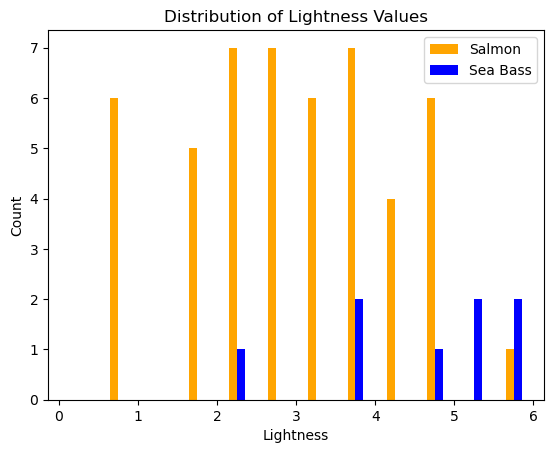

In [13]:
# Plot the bar chart for the distributions
bin_centers = [(bin_edges[i] + bin_edges[i+1]) / 2 for i in range(len(bin_edges) - 1)]
width = 0.1

plt.bar(np.array(bin_centers) - width/2, salmon_counts, width=width, color='orange', label='Salmon')
plt.bar(np.array(bin_centers) + width/2, sea_bass_counts, width=width, color='blue', label='Sea Bass')

plt.xlabel('Lightness')
plt.ylabel('Count')
plt.title('Distribution of Lightness Values')
plt.legend()
plt.show()

In [30]:
# Define a threshold value for classification
threshold = (np.median(salmon_lightness) + np.median(sea_bass_lightness)) / 2

In [31]:
# Rule of decision
def classify(lightness):
    if lightness < threshold:
        return 'salmon'
    else:
        return 'sea_bass'

In [32]:
# Apply the classifier to all data
predicted_labels = [classify(lightness) for lightness in fish_lightness]

In [33]:
# Initialize the count of correct predictions
correct_predictions = 0

# Loop through each index and compare true and predicted labels
for i in range(len(fish_label)):
    if fish_label[i] == predicted_labels[i]:
        correct_predictions += 1

# Output the threshold value
print(f"Threshold value: {threshold}")

Threshold value: 4.972258720098291


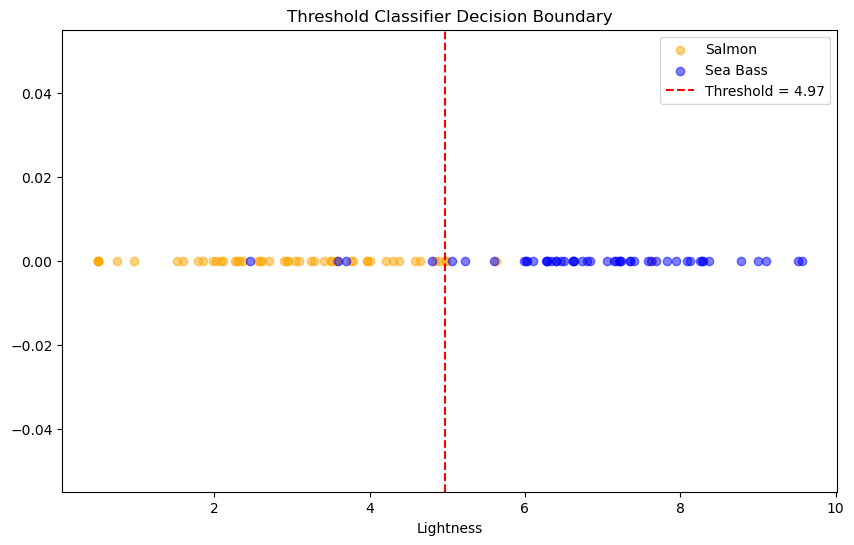

In [34]:
# Plot the decision boundary
plt.figure(figsize=(10, 6))

#Plot salmon data
plt.scatter(salmon_lightness, np.zeros_like(salmon_lightness), color='orange', label='Salmon', alpha=0.5)
# Plot sea bass data
plt.scatter(sea_bass_lightness, np.zeros_like(sea_bass_lightness), color='blue', label='Sea Bass', alpha=0.5)

# Plot the decision boundary
plt.axvline(threshold, color='red', linestyle='--', label=f'Threshold = {threshold:.2f}')

plt.xlabel('Lightness')
plt.title('Threshold Classifier Decision Boundary')
plt.legend()
plt.show()

In [35]:
# Define a range of threshold values for grid search
min_lightness = min(fish_lightness)
max_lightness = max(fish_lightness)
num_thresholds = 100
step_size = (max_lightness - min_lightness) / (num_thresholds - 1)
thresholds = [min_lightness + i * step_size for i in range(num_thresholds)]

In [36]:
# Initialize a list to store the error rates for each threshold
error_rates = []

In [37]:
# Grid search for optimal threshold
for threshold in thresholds:
    # Apply the classifier with the current threshold
    predicted_labels = ['salmon' if lightness < threshold else 'sea_bass' for lightness in fish_lightness]
    
    # Calculate the error rate
    incorrect_predictions = 0
    for i in range(len(fish_label)):
        if fish_label[i] != predicted_labels[i]:
            incorrect_predictions += 1
    error_rate = incorrect_predictions / len(fish_label)
    error_rates.append(error_rate)

In [38]:
# Find the optimal threshold with the minimum error rate
min_error_rate = error_rates[0]
optimal_threshold = thresholds[0]
for i in range(1, len(error_rates)):
    if error_rates[i] < min_error_rate:
        min_error_rate = error_rates[i]
        optimal_threshold = thresholds[i]

In [39]:
# Print the table of thresholds and corresponding error rates
print("Threshold\tError Rate")
for i in range(len(thresholds)):
    print(f"{thresholds[i]:.2f}\t\t{error_rates[i]:.4f}")

Threshold	Error Rate
0.50		0.5000
0.59		0.4600
0.68		0.4600
0.77		0.4500
0.87		0.4500
0.96		0.4500
1.05		0.4400
1.14		0.4400
1.23		0.4400
1.32		0.4400
1.42		0.4400
1.51		0.4400
1.60		0.4200
1.69		0.4200
1.78		0.4200
1.87		0.4000
1.97		0.4000
2.06		0.3800
2.15		0.3600
2.24		0.3600
2.33		0.3300
2.42		0.3200
2.52		0.3300
2.61		0.3100
2.70		0.3000
2.79		0.2900
2.88		0.2900
2.97		0.2600
3.06		0.2500
3.16		0.2400
3.25		0.2300
3.34		0.2200
3.43		0.2100
3.52		0.1900
3.61		0.1800
3.71		0.1900
3.80		0.1700
3.89		0.1700
3.98		0.1500
4.07		0.1400
4.16		0.1400
4.26		0.1300
4.35		0.1200
4.44		0.1100
4.53		0.1100
4.62		0.1000
4.71		0.0900
4.81		0.0900
4.90		0.0800
4.99		0.0600
5.08		0.0700
5.17		0.0700
5.26		0.0800
5.35		0.0800
5.45		0.0800
5.54		0.0800
5.63		0.0900
5.72		0.0800
5.81		0.0800
5.90		0.0800
6.00		0.0900
6.09		0.1100
6.18		0.1200
6.27		0.1200
6.36		0.1600
6.45		0.1800
6.55		0.2000
6.64		0.2300
6.73		0.2300
6.82		0.2500
6.91		0.2600
7.00		0.2600
7.09		0.2700
7.19		0.2900
7.28		0.3200
7.37

In [40]:
# Print the optimal threshold and its error rate
print(f"Optimal Threshold: {optimal_threshold}")
print(f"Minimum Error Rate: {min_error_rate}")

Optimal Threshold: 4.988253723407159
Minimum Error Rate: 0.06


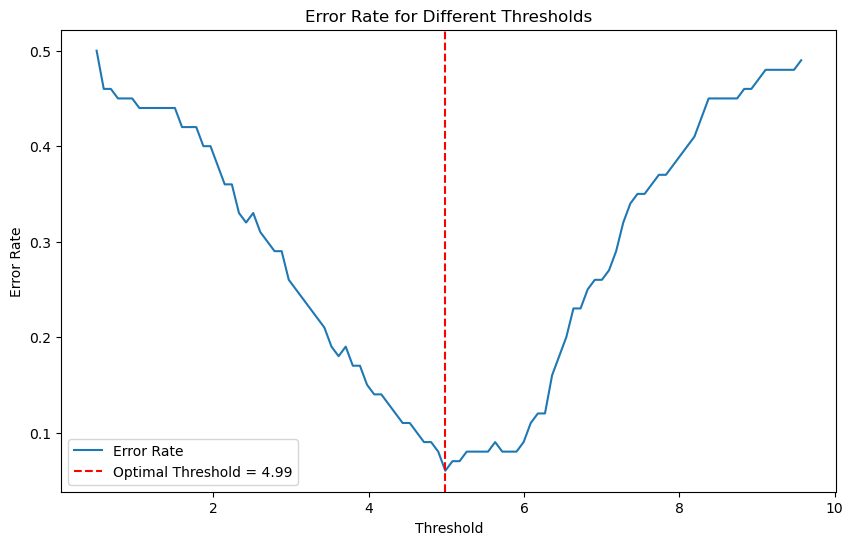

In [41]:
# Plot error rates against thresholds
plt.figure(figsize=(10, 6))
plt.plot(thresholds, error_rates, label='Error Rate')
plt.axvline(optimal_threshold, color='red', linestyle='--', label=f'Optimal Threshold = {optimal_threshold:.2f}')
plt.xlabel('Threshold')
plt.ylabel('Error Rate')
plt.title('Error Rate for Different Thresholds')
plt.legend()
plt.show()